# Connor- Stevens

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute gating variables
def gating(Vm):
    # Sodium and potassium gating variables
    alpha_m = 3.80e5 * (Vm + 0.0297) / (1 - np.exp(-100 * (Vm + 0.0297)))
    beta_m = 1.52e4 * np.exp(-55.6 * (Vm + 0.0547))
    
    alpha_h = 266 * np.exp(-50 * (Vm + 0.048))
    beta_h = 3800 / (1 + np.exp(-100 * (Vm + 0.018)))
    
    alpha_n = 2e4 * (Vm + 0.0457) / (1 - np.exp(-100 * (Vm + 0.0457)))
    beta_n = 250 * np.exp(-12.5 * (Vm + 0.0557))
    
    # Compute time constants and steady-state values
    tau_m = 1 / (alpha_m + beta_m)
    m_inf = alpha_m / (alpha_m + beta_m)
    
    tau_h = 1 / (alpha_h + beta_h)
    h_inf = alpha_h / (alpha_h + beta_h)
    
    tau_n = 1 / (alpha_n + beta_n)
    n_inf = alpha_n / (alpha_n + beta_n)
    
    # A-type current gating variables
    a_inf = (0.0761 * np.exp(31.4 * (Vm + 0.09422)) / (1 + np.exp(34.6 * (Vm + 0.00117))))**(1 / 3.0)
    tau_a = 0.3632e-3 + 1.158e-3 / (1 + np.exp(49.7 * (Vm + 0.05596)))
    
    b_inf = (1 / (1 + np.exp(68.8 * (Vm + 0.0533))))**4
    tau_b = 1.24e-3 + 2.678e-3 / (1 + np.exp(62.4 * (Vm + 0.050)))
    
    return m_inf, tau_m, h_inf, tau_h, n_inf, tau_n, a_inf, tau_a, b_inf, tau_b

# Parameters
V_L = -0.017
E_Na = 0.055
E_K = -0.072
E_A = -0.075

G_L = 3e-8
G_Na = 1.2e-5
G_K = 2e-6
G_A = 4.77e-6

Cm = 0.1e-9
dt = 5e-6

Vspike = 0.0
Vendspike = -0.020

0/1
0/61
1/61
2/61
3/61
4/61
5/61
6/61
7/61
8/61
9/61
10/61
11/61
12/61
13/61
14/61
15/61
16/61
17/61
18/61
19/61
20/61
21/61
22/61
23/61
24/61
25/61
26/61
27/61
28/61
29/61
30/61
31/61
32/61
33/61
34/61
35/61
36/61
37/61
38/61
39/61
40/61
41/61
42/61
43/61
44/61
45/61
46/61
47/61
48/61
49/61
50/61
51/61
52/61
53/61
54/61
55/61
56/61
57/61
58/61
59/61
60/61


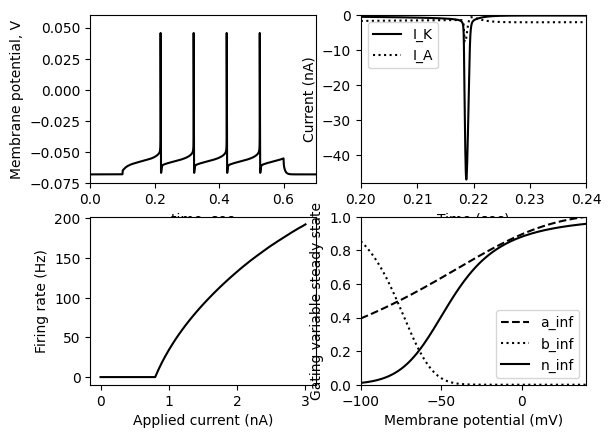

In [2]:
# Part 1 for current step (A, C in figure), Part 2 for f-I curve
for figure_part in range(1, 3):
    if figure_part == 1:
        tmin = -0.1
        tmax = 0.7
        Iappvec = [0.85e-9]
        istart = 0.1
        ilength = 0.5
    else:
        tmin = 0
        tmax = 5
        istart = tmin
        ilength = tmax - tmin
        t = np.arange(tmin, tmax + dt, dt)
        Iappvec = np.arange(0, 3.05e-9, 0.05e-9)

    nstart = int(np.floor((istart - tmin) / dt)) + 1
    nstop = int(np.floor((istart + ilength - tmin) / dt)) + 1
    Ibase = 0e-9
    Ntrials = len(Iappvec)
    rate = np.zeros(Ntrials)
    t = np.arange(tmin, tmax + dt, dt)

    for trial in range(Ntrials):
        print(f'{trial}/{Ntrials}')
        Ie = Iappvec[trial]
        Iapp = Ibase * np.ones(len(t))
        Iapp[nstart:nstop] = Ie
        spike = np.zeros(len(t))
        inspike = 0
        V = np.zeros(len(t))
        V[0] = V_L
        n = np.zeros(len(t))
        n[0] = 0.0
        m = np.zeros(len(t))
        m[0] = 0.0
        h = np.zeros(len(t))
        h[0] = 0.0
        a = np.zeros(len(t))
        a[0] = 0.0
        b = np.zeros(len(t))
        b[0] = 0.0
        Itot = np.zeros(len(t))
        I_Na = np.zeros(len(t))
        I_K = np.zeros(len(t))
        I_A = np.zeros(len(t))
        I_L = np.zeros(len(t))

        for i in range(1, len(t)):
            Vm = V[i - 1]
            m_inf, tau_m, h_inf, tau_h, n_inf, tau_n, a_inf, tau_a, b_inf, tau_b = gating(Vm)
            m[i] = m[i - 1] + (m_inf - m[i - 1]) * dt / tau_m
            h[i] = h[i - 1] + (h_inf - h[i - 1]) * dt / tau_h
            n[i] = n[i - 1] + (n_inf - n[i - 1]) * dt / tau_n
            a[i] = a[i - 1] + (a_inf - a[i - 1]) * dt / tau_a
            b[i] = b[i - 1] + (b_inf - b[i - 1]) * dt / tau_b
            I_L[i] = G_L * (V_L - V[i - 1])
            I_Na[i] = G_Na * m[i]**3 * h[i] * (E_Na - V[i - 1])
            I_K[i] = G_K * n[i]**4 * (E_K - V[i - 1])
            I_A[i] = G_A * a[i]**3 * b[i] * (E_A - V[i - 1])
            Itot[i] = I_L[i] + I_Na[i] + I_K[i] + I_A[i] + Iapp[i]
            V[i] = V[i - 1] + Itot[i] * dt / Cm
            if inspike == 0 and V[i] > Vspike:
                inspike = 1
                spike[i] = 1
            elif inspike == 1 and V[i] < Vendspike:
                inspike = 0
        spiketimes = dt * np.where(spike == 1)[0]
        if len(spiketimes) > 1:
            isis = np.diff(spiketimes)
            rate[trial] = 1 / isis[-1]
    
    if figure_part == 1:
        plt.figure(1)
        plt.clf()
        plt.subplot(221)
        plt.plot(t, V, 'k')
        plt.xlabel('time, sec')
        plt.ylabel('Membrane potential, V')
        plt.axis([0, 0.7, -0.075, 0.06])
        plt.subplot(222)
        plt.plot(t, I_K * 1e9, 'k-')
        plt.plot(t, I_A * 1e9, 'k:')
        plt.axis([0.2, 0.24, -48, 0])
        plt.xlabel('Time (sec)')
        plt.ylabel('Current (nA)')
        plt.legend(['I_K', 'I_A'])
    else:
        plt.subplot(223)
        plt.plot(Iappvec * 1e9, rate, 'k')
        plt.xlabel('Applied current (nA)')
        plt.ylabel('Firing rate (Hz)')

plt.subplot(224)
Vm = np.arange(-0.100, 0.041, 0.001)
m_inf, tau_m, h_inf, tau_h, n_inf, tau_n, a_inf, tau_a, b_inf, tau_b = gating(Vm)
plt.plot(Vm * 1000, a_inf, 'k--')
plt.xlabel('Membrane potential (mV)')
plt.ylabel('Gating variable steady state')
plt.plot(Vm * 1000, b_inf, 'k:')
plt.plot(Vm * 1000, n_inf, 'k')
plt.axis([-100, 40, 0, 1])
plt.legend(['a_inf', 'b_inf', 'n_inf'])

plt.show()

In [52]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

#Definición de Parámetros

Iapp = 850e-12    # applied current
Ena = 0.055   # reversal for sodium channels
Ek = -0.072   # reversal for potassium channels
Ea = -0.075   # reversal for A-type current
EL = -0.017
GLeak = 3e-8     # leak conductance
GmaxNa = 1.2e-5  # sodium conductance
GmaxK = 2e-6     # potassium conductance
GmaxA = 4.77e-6  # A-tpe potassium conductance
Cm = 0.1e-9;     # membrane capacitance


#Definición de la función del modelo
def ConnorStevens(variables, t):
    Vm = variables[0]
    m = variables[1]
    h = variables[2]
    n = variables[3]
    a = variables[4]
    b = variables[5]
    
    dVmdt = (GLeak*(EL-Vm)+GmaxNa*(m**3)*h*(Ena-Vm)+GmaxK*(n**4)*(Ek-Vm)+GmaxA*(a**3)*b*(Ea-Vm)+Iapp)/Cm
    
    alpha_m = 3.80e5*(Vm+0.0297)/(1-np.exp(-100*(Vm+0.0297)))
    beta_m = 1.52e4*np.exp(-55.6*(Vm+0.0547))
        
    alpha_h = 266*np.exp(-50*(Vm+0.048));
    beta_h = 3800/(1+np.exp(-100*(Vm+0.018)))
        
    alpha_n = 2e4*(Vm+0.0457)/(1-np.exp(-100*(Vm+0.0457)))
    beta_n = 250*np.exp(-12.5*(Vm+0.0557))
    
    dmdt = alpha_m*(1-m)-beta_m*m 
    dhdt = alpha_h*(1-h)-beta_h*h
    dndt = alpha_n*(1-n)-beta_n*n
    
    a_inf = (0.0761*np.exp(31.4*(Vm+0.09422))/(1+np.exp(34.6*(Vm+0.00117))))**(1/3.0)
    tau_a = 0.3632e-3 + 1.158e-3/(1+np.exp(49.7*(Vm+0.05596)))
        
    b_inf = (1/(1+np.exp(68.8*(Vm+0.0533))))**4
    tau_b = 1.24e-3 + 2.678e-3/(1+np.exp(62.4*(Vm+0.050)))
    
    dadt = (a_inf-a)/tau_a
    dbdt = (b_inf-b)/tau_b
    
    return dVmdt, dmdt, dhdt, dndt, dadt, dbdt

#Condiciones iniciales y el vector de tiempo
Vm_0 = 0
m_0 = 0
n_0 = 0
h_0 = 0
a_0 = 0
b_0 = 0

cond_0 = (Vm_0, m_0, h_0, n_0, a_0, b_0)
vecTime = np.linspace(0, 1, 5000)

#odeint(model_name, cond_init, time)
simu = odeint(ConnorStevens, cond_0, vecTime)

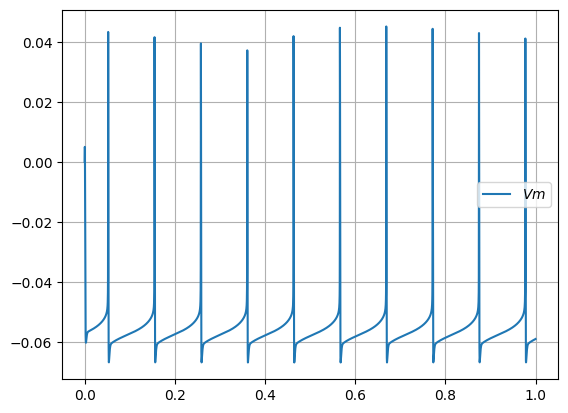

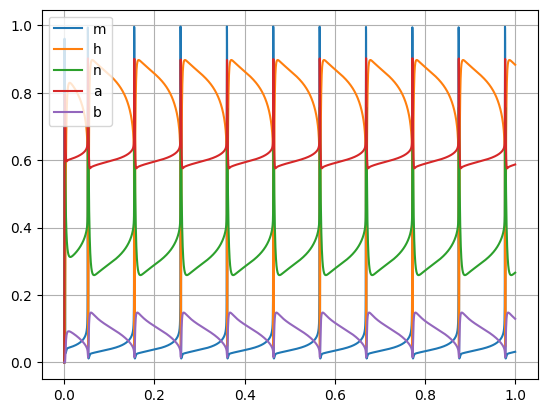

In [58]:
#Voltage in time
plt.figure()
plt.plot(vecTime, simu[:,0], label=r'$Vm$')
plt.grid()
plt.legend()

# Gating variables in time
plt.figure()
var = ['m','h','n','a','b']
plt.plot(vecTime, simu[:,1:], label=[f'{v}' for v in var])
#plt.hlines(K, vecTime[0], vecTime[-1], linestyle='dashed', color='k')
plt.grid()
plt.legend()
plt.show()

# Leaky Integrate-and-fire Model

nr of spikes: 0


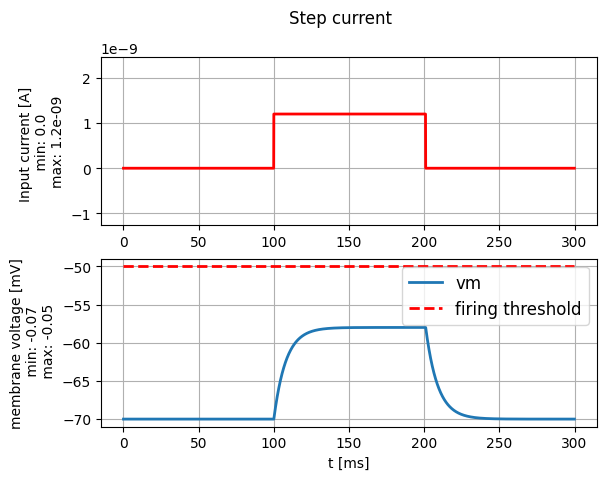

nr of spikes: 5


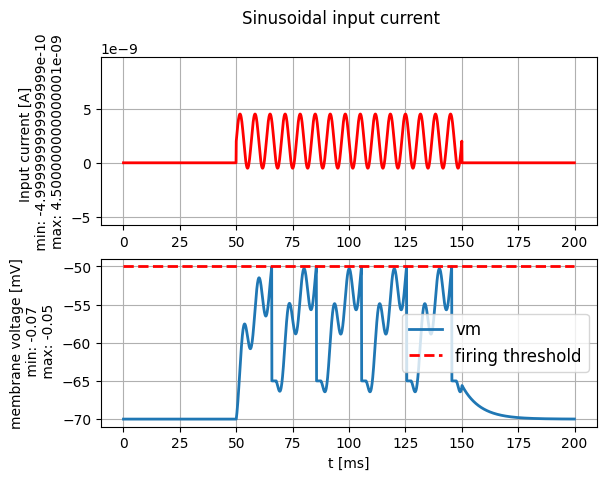

Resting potential: -0.07
Reset voltage: -0.065
Firing threshold: -0.05
Membrane resistance: 10000000.0
Membrane time-scale: 0.008
Absolute refractory period: 0.002


In [66]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory, plot_tools

LIF.getting_started()
LIF.print_default_parameters()

resting potential: -0.07
nr of spikes: 10


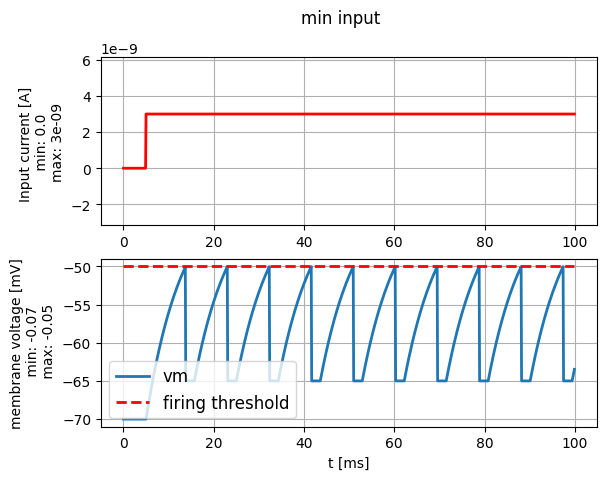

In [80]:
import brian2 as b2
from neurodynex3.leaky_integrate_and_fire import LIF
from neurodynex3.tools import input_factory
print("resting potential: {}".format(LIF.V_REST))

#Access to the attributes
#attributes_dict = vars(LIF)
# Print the attributes
#for attribute, value in attributes_dict.items():
#    print("{}: {}".format(attribute, value))

#LIF.V_REST: -0.065
#LIF.V_RESET: -0.065
#LIF.FIRING_THRESHOLD: -0.05
#LIF.MEMBRANE_RESISTANCE: 10000000.0
#LIF.MEMBRANE_TIME_SCALE: 0.008
#LIF.ABSOLUTE_REFRACTORY_PERIOD: 0.002

#I_min = ((LIF.FIRING_THRESHOLD-LIF.V_REST)/LIF.MEMBRANE_RESISTANCE)
I_min = 3000 * b2.pA #Maximum

# create a step current with amplitude = I_min
step_current = input_factory.get_step_current(t_start=5, t_end=100, unit_time=b2.ms,amplitude=I_min)  # set I_min to your value

# run the LIF model.
# Note: As we do not specify any model parameters, the simulation runs with the default values
(state_monitor,spike_monitor) = LIF.simulate_LIF_neuron(input_current=step_current, simulation_time = 100 * b2.ms)

# plot I and vm
plot_tools.plot_voltage_and_current_traces(
state_monitor, step_current, title="min input", firing_threshold=LIF.FIRING_THRESHOLD)
print("nr of spikes: {}".format(spike_monitor.count[0]))  # should be 0

WARNING    C:\Users\afcad\anaconda3\envs\py37\lib\site-packages\brian2\units\fundamentalunits.py:1397: RuntimeWarning: divide by zero encountered in true_divide
  result = operation(self_arr, other_arr)
 [py.warnings]


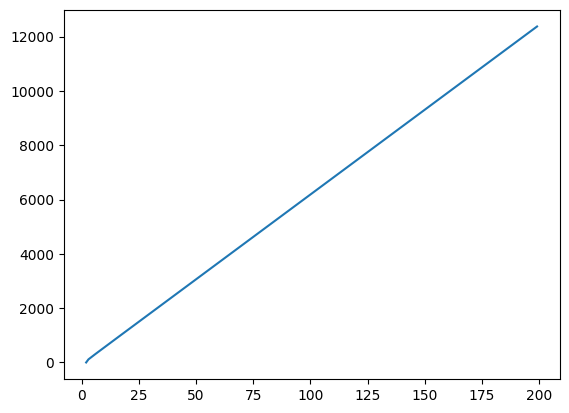

In [7]:
#For a constant input current I, a LIF neuron fires regularly with firing frequency f. 
#If the current is to small (I<Imin) f is 0Hz; for larger I  the rate increases. 
#A neuron’s firing-rate versus input-amplitude relationship is visualized in an “f-I curve”.

F=[]
I = np.arange(2,200)
#I = np.linspace(0,10,100)

for i in I:
    t = LIF.MEMBRANE_TIME_SCALE*np.log((LIF.MEMBRANE_RESISTANCE*i*b2.nA)/(LIF.MEMBRANE_RESISTANCE*i*b2.nA-LIF.FIRING_THRESHOLD+LIF.V_REST))
    f = 1/t
    F.append(f)

plt.plot(I,F)

(<AxesSubplot:ylabel='Input current [A] \n min: 0.0 \nmax: 2e-08'>,
 <AxesSubplot:xlabel='t [ms]', ylabel='membrane voltage [mV]\n min: -0.068\n max: -0.016154488272857176'>)

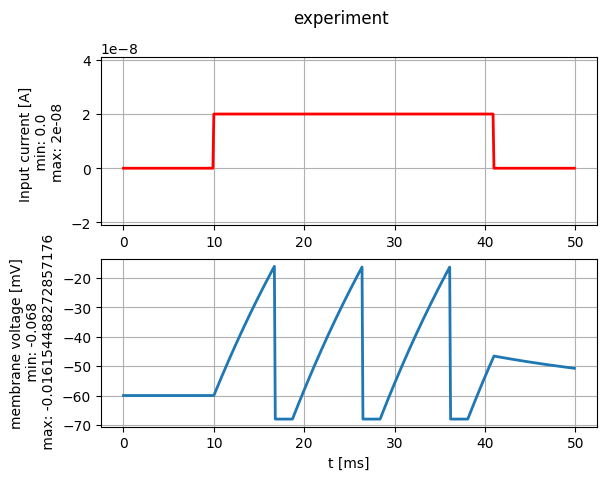

In [8]:
# get a random parameter. provide a random seed to have a reproducible experiment
random_parameters = LIF.get_random_param_set(random_seed=432)

# define your test current
test_current = input_factory.get_step_current(
    t_start=10, t_end=40, unit_time=b2.ms, amplitude= 20 * b2.namp)

# probe the neuron. pass the test current AND the random params to the function
state_monitor, spike_monitor = LIF.simulate_random_neuron(test_current, random_parameters)

# plot
plot_tools.plot_voltage_and_current_traces(state_monitor, test_current, title="experiment")

# print the parameters to the console and compare with your estimates
# LIF.print_obfuscated_parameters(random_parameters)

nr of spikes: 20


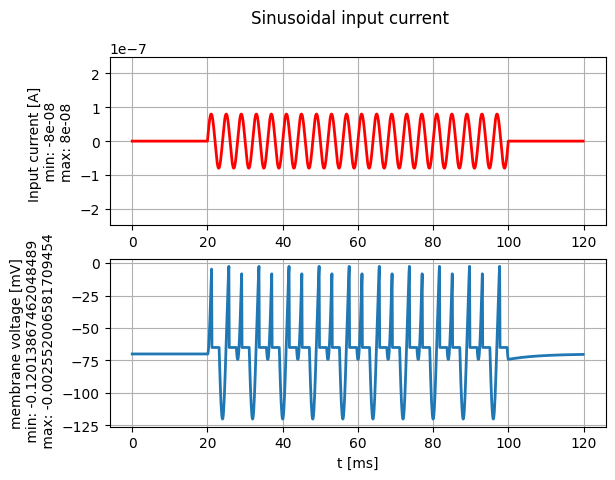

In [9]:
# note the higher resolution when discretizing the sine wave: we specify unit_time=0.1 * b2.ms
sinusoidal_current = input_factory.get_sinusoidal_current(200, 1000, unit_time=0.1 * b2.ms,
                                            amplitude= 80 * b2.namp, frequency=250*b2.Hz,
                                            direct_current=0. * b2.namp)

# run the LIF model. By setting the firing threshold to to a high value, we make sure to stay in the linear (non spiking) regime.
(state_monitor, spike_monitor) = LIF.simulate_LIF_neuron(input_current=sinusoidal_current, simulation_time = 120 * b2.ms, firing_threshold=0*b2.mV)

# plot the membrane voltage
plot_tools.plot_voltage_and_current_traces(state_monitor, sinusoidal_current, title="Sinusoidal input current")
print("nr of spikes: {}".format(spike_monitor.count[0]))

# Exponential Integrate-and-Fire model

nr of spikes: 7


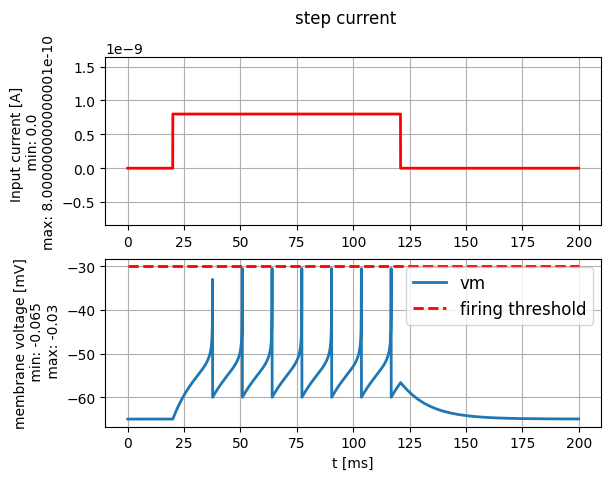

In [10]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory

input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

#exp_IF.MEMBRANE_TIME_SCALE_tau = 12.0 * b2.ms
#exp_IF.MEMBRANE_RESISTANCE_R = 20.0 * b2.Mohm
#exp_IF.V_REST = -65.0 * b2.mV
#exp_IF.V_RESET = -60.0 * b2.mV
#exp_IF.RHEOBASE_THRESHOLD_v_rh = -55.0 * b2.mV
#exp_IF.SHARPNESS_delta_T = 2.0 * b2.mV
#exp_IF.FIRING_THRESHOLD_v_spike = -30. * b2.mV

nr of spikes: 7


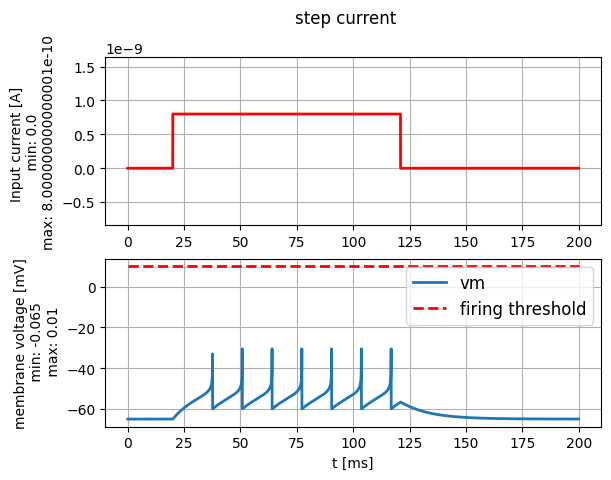

In [11]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory

input_current = input_factory.get_step_current(t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8 * b2.namp)

exp_IF.FIRING_THRESHOLD_v_spike = 10*b2.mV
state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=200*b2.ms, v_spike=exp_IF.FIRING_THRESHOLD_v_spike)


plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

Minimum current to trigger spike 0.5 nA
nr of spikes: 8


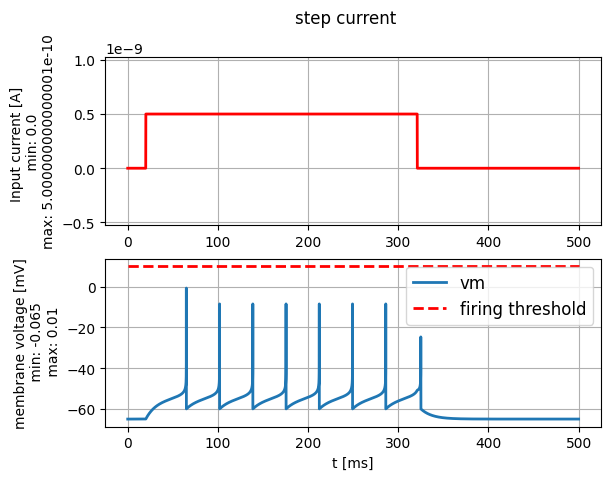

In [12]:
theta_rh = -55.0 * b2.mV
u_rest = -65.0 * b2.mV
R = 20.0 * b2.Mohm
I_rh = (theta_rh - u_rest) / R
print('Minimum current to trigger spike', I_rh)

input_current = input_factory.get_step_current(
    t_start=20, t_end=320, unit_time=b2.ms, amplitude=I_rh)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, v_rheobase = theta_rh, v_spike = 10 * b2.mV, simulation_time=500*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

nr of spikes: 0


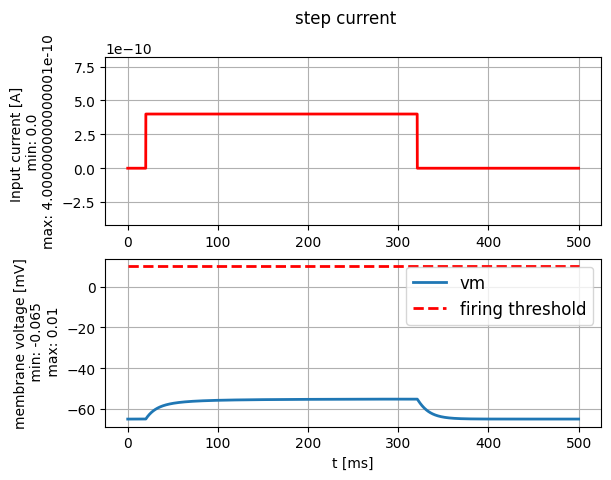

In [13]:
input_current = input_factory.get_step_current(
    t_start=20, t_end=320, unit_time=b2.ms, amplitude=I_rh - 0.1*b2.nA)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, v_rheobase = theta_rh, v_spike = 10 * b2.mV, simulation_time=500*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

nr of spikes: 1


Text(0, 0.5, 'min amplitude [nAmp]')

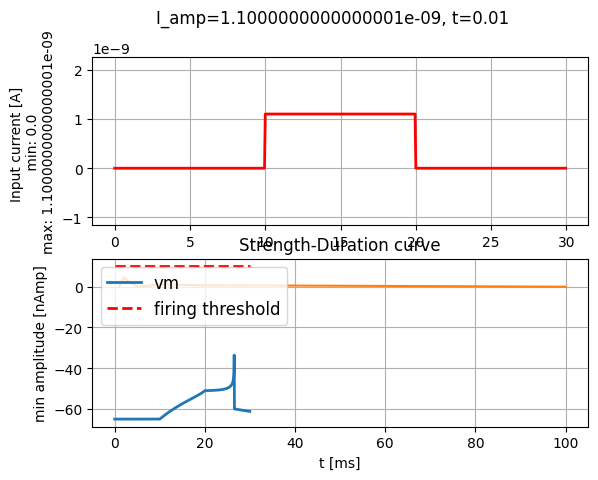

In [14]:
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex3.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex3.tools import plot_tools, input_factory

i=3  #change i and find the value that goes into min_amp
durations = [1,   2,    5,  10,   20,   50, 100]
min_amp =   [0., 4.42, 0., 1.10, .70, .48, 0.]

t=durations[i]
I_amp = min_amp[i]*b2.namp
title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)

input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+20)*b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, input_current,
                                           title=title_txt, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
                                          legend_location=2)
print("nr of spikes: {}".format(spike_monitor.count[0]))

plt.plot(durations, min_amp)
plt.title("Strength-Duration curve")
plt.xlabel("t [ms]")
plt.ylabel("min amplitude [nAmp]")

# Adaptive Exponential Integrate-and-Fire model

nr of spikes: 10


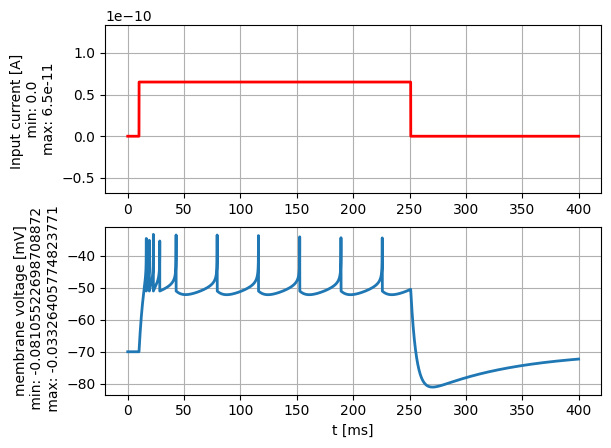

In [15]:
%matplotlib inline
import brian2 as b2
from neurodynex3.adex_model import AdEx
from neurodynex3.tools import plot_tools, input_factory

current = input_factory.get_step_current(10, 250, 1. * b2.ms, 65.0 * b2.pA)
state_monitor, spike_monitor = AdEx.simulate_AdEx_neuron(I_stim=current, simulation_time=400 * b2.ms)
plot_tools.plot_voltage_and_current_traces(state_monitor, current)
print("nr of spikes: {}".format(spike_monitor.count[0]))
# AdEx.plot_adex_state(state_monitor)

# Hodgkin and Huxley model

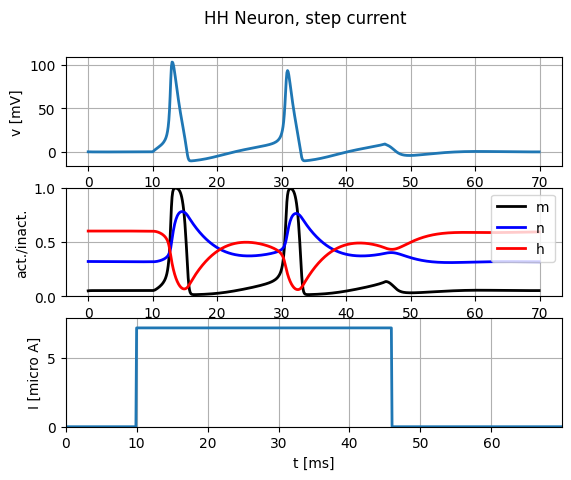

In [59]:
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.hodgkin_huxley import HH
from neurodynex3.tools import input_factory

HH.getting_started()

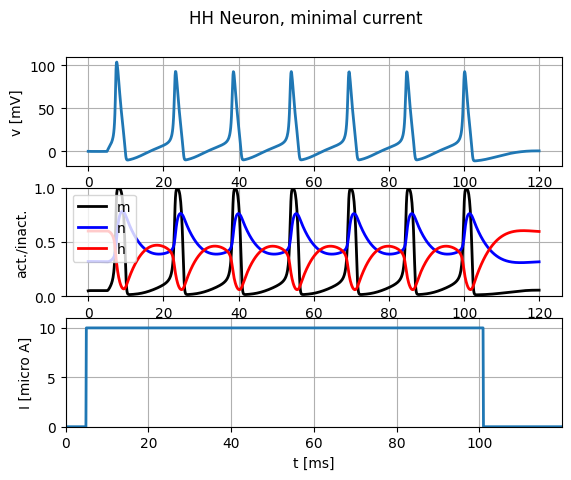

In [60]:
I_min = 10 #2
current = input_factory.get_step_current(5, 100, b2.ms, I_min *b2.uA)
state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, minimal current")

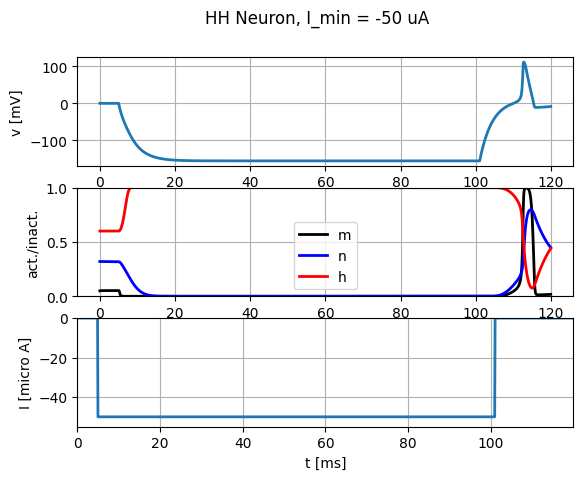

WARNING    C:\Users\afcad\anaconda3\envs\py37\lib\site-packages\neurodynex3\hodgkin_huxley\HH.py:65: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  max(state_monitor.I_e[0] / b2.uamp) * 1.1
 [py.warnings]


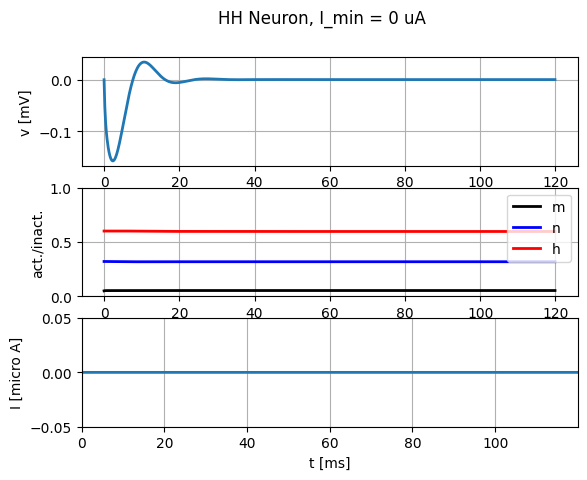

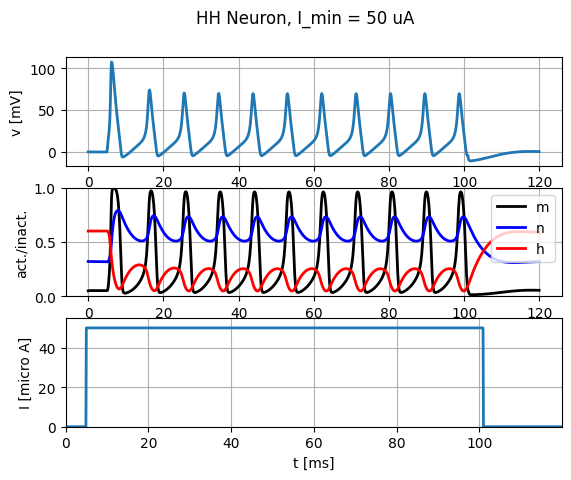

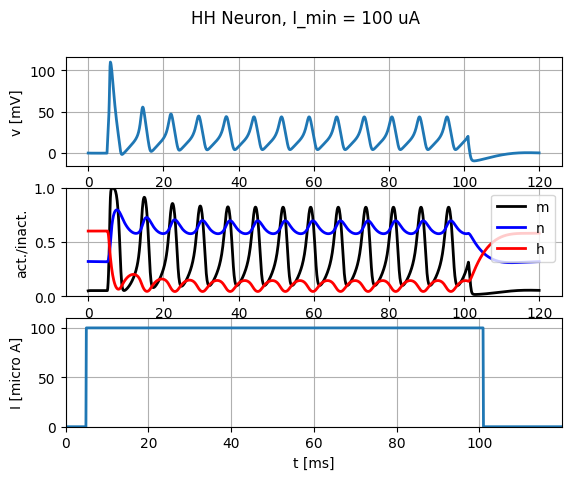

<Figure size 640x480 with 0 Axes>

In [65]:
import matplotlib.pyplot as plt

I_min_values = [-50, 0, 50, 100]  # Define the different applied current values


for i, I_min in enumerate(I_min_values):
    current = input_factory.get_step_current(5, 100, b2.ms, I_min * b2.uA)
    state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
    
    # Calculate the subplot indices
    row = i // 2
    col = i % 2
    
    # Plot the data in the corresponding subplot
    HH.plot_data(state_monitor, title=f"HH Neuron, I_min = {I_min} uA")

# Adjust layout and display the subplots
plt.tight_layout()
plt.show()


voltage_slow=0.0064804980615148396


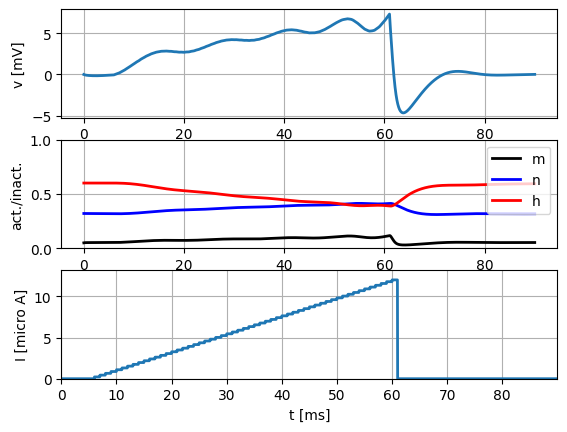

In [11]:
b2.defaultclock.dt = 0.02*b2.ms
slow_ramp_t_end = 60  # no spike. make it shorter
slow_ramp_current = input_factory.get_ramp_current(5, slow_ramp_t_end, b2.ms, 0.*b2.uA, 12.0*b2.uA)
state_monitor = HH.simulate_HH_neuron(slow_ramp_current, 90 * b2.ms)
idx_t_end = int(round(slow_ramp_t_end*b2.ms / b2.defaultclock.dt))
voltage_slow = state_monitor.vm[0,idx_t_end]
print("voltage_slow={}".format(voltage_slow))
HH.plot_data(state_monitor) 

voltage_fast=0.004937049293720059


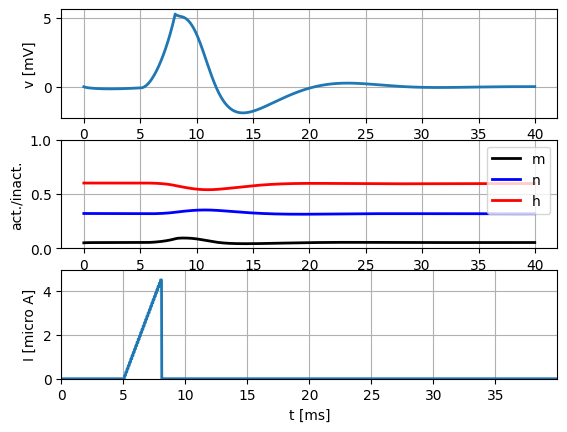

In [12]:
b2.defaultclock.dt = 0.02*b2.ms
fast_ramp_t_end = 80  # no spike. make it longer
fast_ramp_current = input_factory.get_ramp_current(50, fast_ramp_t_end, 0.1*b2.ms, 0.*b2.uA, 4.5*b2.uA)
state_monitor = HH.simulate_HH_neuron(fast_ramp_current, 40 * b2.ms)
idx_t_end = int(round(fast_ramp_t_end*0.1*b2.ms / b2.defaultclock.dt))
voltage_fast = state_monitor.vm[0,idx_t_end]
print("voltage_fast={}".format(voltage_fast))
HH.plot_data(state_monitor) 

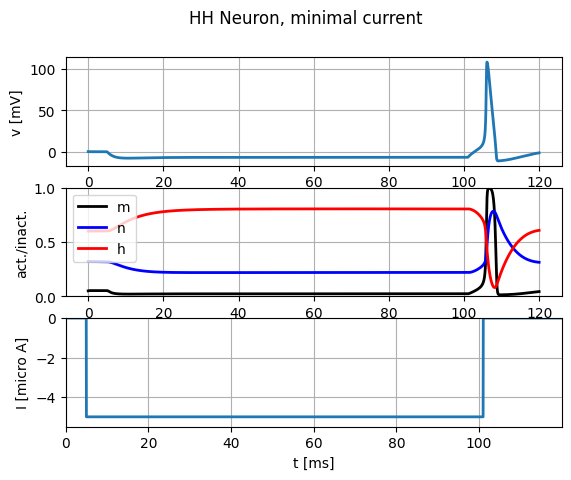

In [15]:
I_min = -5
current = input_factory.get_step_current(5, 100, b2.ms, I_min *b2.uA)
state_monitor = HH.simulate_HH_neuron(current, 120 * b2.ms)
HH.plot_data(state_monitor, title="HH Neuron, minimal current")

In [6]:
from sympy import *
alpha, beta, Lambda = symbols('alpha beta Lambda')
I = eye(2)
A = Matrix([[alpha, -1], [beta, -1]])
equation = Eq(det(Lambda*I-A), 0)
D = solve(equation)
D

[{alpha: (Lambda**2 + Lambda + beta)/(Lambda + 1)}]

# FitzHugh-Nagumo

fixed_point: (-1.0000000000000002, -4.440892098500626e-16)


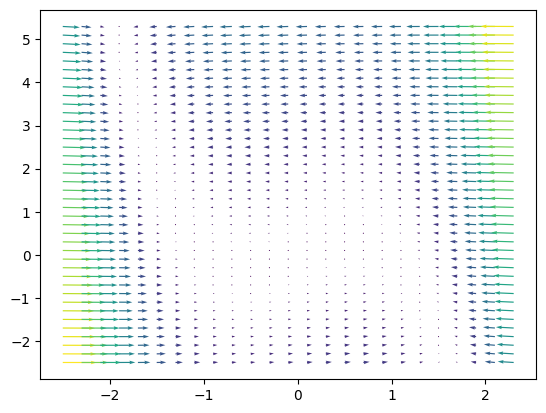

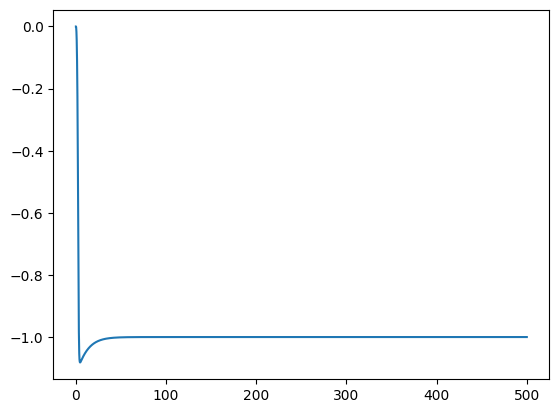

In [60]:
%matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import numpy as np
from neurodynex3.phase_plane_analysis import fitzhugh_nagumo

fitzhugh_nagumo.plot_flow()

fixed_point = fitzhugh_nagumo.get_fixed_point()
print("fixed_point: {}".format(fixed_point))

plt.figure()
trajectory = fitzhugh_nagumo.get_trajectory()
plt.plot(trajectory[0], trajectory[1])